In [31]:
import os
from PIL import Image
import matplotlib.pyplot as plt

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split

from  PIL import Image

from elle_ebene.utils.simple_preprocessing import get_images, to_numpy_rgb, squared_imgs, create_dataset
from elle_ebene.hair_segmentation.hair_seg import HairSegmenter

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
import math
from tensorflow.keras import regularizers

In [3]:
abs_path = "/home/aymeric/code/Aymeric-B/elle_ebene/raw_data/Clientes"

In [4]:
images = []
for path, subdirs, files in os.walk(abs_path):
    for name in files:
        images.append(Image.open(os.path.join(path, name)))

In [5]:
len(images)

721

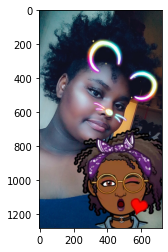

In [6]:
plt.imshow(images[0])

In [7]:
abs_path_3 = "/home/aymeric/code/Aymeric-B/elle_ebene/raw_data/ClientesParticulieres/Type 3"

In [8]:
images3 = []
for path, subdirs, files in os.walk(abs_path_3):
    for name in files:
        images3.append(Image.open(os.path.join(path, name)))

In [9]:
len(images3)

22

In [19]:
def initialize_model():
   
    model  = models.Sequential()
    
    ### First convolution & max-pooling
    model.add(layers.Conv2D(16, kernel_size=(4, 4), activation='relu', input_shape=(224, 224, 3), padding = "same"))
    #model.add(layers.Dropout(rate=0.2))
    
    ### Second convolution
    model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(layers.MaxPool2D(pool_size = (4,4)))    
    #model.add(layers.Dropout(rate=0.2))
    
    ### Third convolution
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same"))  
    #model.add(layers.Dropout(rate=0.2))
    
    ### Fourth convolution
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(layers.MaxPool2D(pool_size = (4,4)))    
    #model.add(layers.Dropout(rate=0.2))
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One fully connected
    model.add(layers.Dense(32, activation='relu')) 
    #model.add(layers.Dropout(rate=0.4))

    ### Last layer
    model.add(layers.Dense(2, activation='sigmoid')) 

    model.compile(loss='binary_crossentropy',
            optimizer=optimizers.Adam(learning_rate = 0.001),
            metrics=['accuracy'])
    
    return model

In [20]:

model= initialize_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 16)      784       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [21]:
model.load_weights("/home/aymeric/code/Aymeric-B/elle_ebene/model_weights/seg_aug/weights")

In [22]:
from elle_ebene.utils.simple_preprocessing import get_images, to_numpy_rgb, squared_imgs, create_dataset, resize_img
from elle_ebene.hair_segmentation.hair_seg import HairSegmenter

In [32]:
images = [resize_img(img,224) for img in images]

In [33]:
images_rgb = to_numpy_rgb(images)
images_squared = squared_imgs(images_rgb)

In [34]:
segmenter = HairSegmenter()
segmenter.model_init()

In [35]:
hair = segmenter.get_hairs(images_squared)

labels = np.full((len(images),),4)

In [38]:
hair_numpy = np.asarray(hair)

In [39]:
hair_numpy.shape

(721, 224, 224, 3)

In [37]:
hair_numpy = hair_numpy/255
labels = to_categorical(labels,5)[:,-2:]

In [40]:
model.evaluate(hair_numpy, labels)

23/23 [==============================] - 81s 4s/step - loss: 0.5658 - accuracy: 0.6768


[0.5658335089683533, 0.6768377423286438]